# Введение

<div style="border:solid Chocolate 2px; padding: 40px">

        
Совместно с отделом маркетинга был разработан спиоск гипотез для увеличения выручки. В этом проекте мы приоритизируем гипотезы, запустим A/B-тест и проанализируем результаты.
    
    
Проект состоит из двух частей.

<h2> Часть 1. Приоритизация гипотез. <a class="tocSkip"> </h2> 

- применить фреймфорки ICE и RICE. Посмотреть, как отличаются результаты
    
<h2> Часть 2. Анализ A/B-теста <a class="tocSkip"> </h2> 

- построить график кумулятивной выручки по группам.  
- построить график кумулятивного среднего чека по группам. 
- построить график относительного изменения кумулятивного среднего чека группы B к группе A. 
- Построить график кумулятивного среднего количества заказов по группам. 
- Построить график относительного изменения кумулятивного среднего количества заказов группы B к группе A. 
- Построить точечный график количества заказов по пользователям. 
- Посчитать 95-й и 99-й перцентили количества заказов на пользователя. 
- Построить точечный график стоимостей заказов. 
- Посчитать 95-й и 99-й перцентили стоимости заказов. 
- Посчитать статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным. 
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 
- Посчитать статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным. 
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 
- Примите решение по результатам теста


## Предобработка данных  

In [1]:
# Импортируем библиотеки

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [3]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [5]:
#приводим столбцы к удобному формату
hypothesis.columns = hypothesis.columns.str.lower()

In [6]:
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [8]:
#поменяем тип данных
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')

In [9]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [10]:
#проверим на дупликаты
orders.duplicated().sum()

0

In [11]:
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [12]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [13]:
#поменяем тип данных
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')

In [14]:
#проверим на дупликаты
visitors.duplicated().sum()

0

<div class="alert alert-info">
<h2> Комментарий<a class="tocSkip"></h2>

Выполнил предобрадоку данных. Дубликатов нет, в orders и visitors поменял тип данных в датах. Поменяли названия столбцов
</div>


## Приоритизация гипотез

In [15]:
#ICE
hypothesis['ICE'] = (hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']

pd.options.display.max_colwidth = 400 
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False).round(1)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0


In [16]:
#RICE
hypothesis['RICE'] = (hypothesis['reach']*hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']

pd.options.display.max_colwidth = 400 
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


<div class="alert alert-info">
<h2> Комментарий студента<a class="tocSkip"></h2>

Из-за разницы в методе подсчета результаты отличаются. В RICE используется показатель "охват". Поэтому "лидеры" выглядят следующим образом: 
- ICE - 8,7,0
- RICE - 7,2,0
</div>

## Анализ A/B-теста

In [17]:
len(np.intersect1d(orders.query('group == "A"')['visitorId'].unique(), orders.query('group == "B"')['visitorId'].unique()))
list_id = np.intersect1d(orders.query('group == "A"')['visitorId'].unique(), 
                         orders.query('group == "B"')['visitorId'].unique())
list_id = list_id.tolist()
orders = orders[~orders['visitorId'].isin(list_id)]


### Таблица кумулятивной выручки по группам. 

In [18]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      23      19   142779       719
1 2019-08-01     B      17      17    59758       713
2 2019-08-02     A      42      36   234381      1338
3 2019-08-02     B      40      39   221801      1294
4 2019-08-03     A      66      60   346854      1845


### Графики кумулятивной выручки по дням и группам A/B-тестирования 

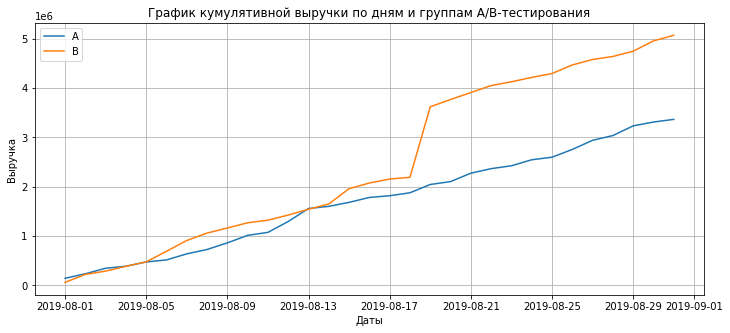

In [19]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(12,5))

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.grid()
plt.legend()
plt.title('График кумулятивной выручки по дням и группам A/B-тестирования')
plt.xlabel('Даты')
plt.ylabel('Выручка')
plt.show()

<div class="alert alert-info">
<h2> Комментарий студента<a class="tocSkip"></h2>

Выручка в обеих группах росла примерно одинаково. 13го августа они были на одном уровне. Однако с 18 августа в группе В есть резкий скачек. Необходимо проверить, с чем он связан. Либо большой заказ, либо сильный прирост заказов в этот день
</div>

### График кумулятивного среднего чека по группам.

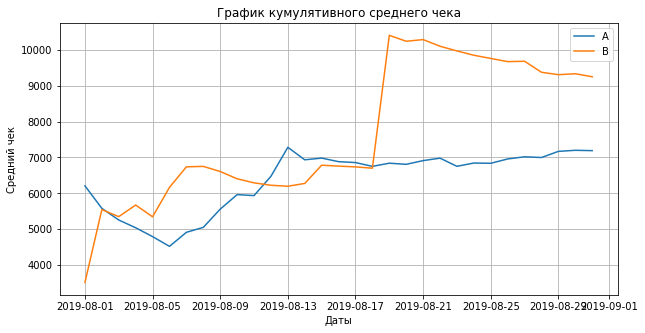

In [20]:
plt.figure(figsize=(10,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 
plt.title('График кумулятивного среднего чека')
plt.xlabel('Даты')
plt.ylabel('Средний чек')
plt.grid()

<div class="alert alert-info">
<h2> Комментарий студента<a class="tocSkip"></h2>

Наблюдаем схожую ситуацию. До 18 августа росто примерно одинаковый. Однака с 18го числа группа В сильно вырывается вперед. 
</div>

### График относительного изменения кумулятивного среднего количества заказов группы B к группе A. 

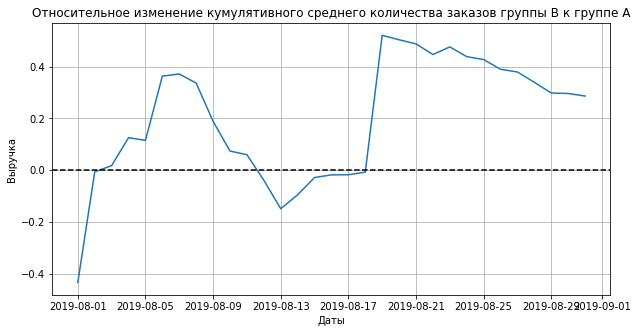

In [21]:
plt.figure(figsize=(10,5))
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Относительное изменение кумулятивного среднего количества заказов группы B к группе A')
plt.xlabel('Даты')
plt.ylabel('Выручка')
plt.grid()

<div class="alert alert-info">
<h2> Комментарий студента<a class="tocSkip"></h2>

Снова видим похожую картину. Группа В сильно вырывается в районе 18го числа. Необходимо понять, что это за анамалии. 
</div>

### Анализ кумулятивной конверсии по группам

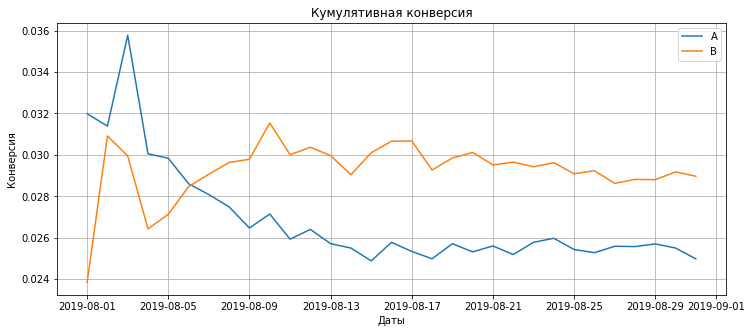

In [22]:


cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(12,5))
plt.grid()
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('Кумулятивная конверсия')
plt.xlabel('Даты')
plt.ylabel('Конверсия')
plt.legend();


<div class="alert alert-block alert-info">
  
  <b>Комментарий cтудента ver. 2</b>
    
  В начале теста обе группы сильно колебались. Поначалу группа А даже была выше. Однако к 6 августа группы сравнялись, а дальше группа В выбилась вперед, а к 10 августа сильные колебания прекратились. Конверсия оставалась примерно на одном уровне.
</div>

### Анализ относительного изменения кумулятивной конверсии группы В к группе А.

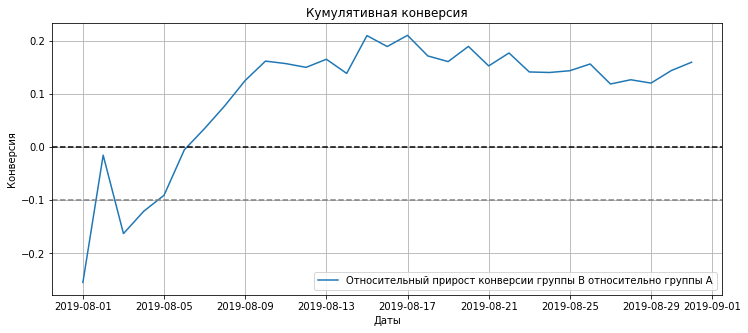

In [23]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(12,5))
plt.grid()
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.title('Кумулятивная конверсия')
plt.xlabel('Даты')
plt.ylabel('Конверсия')


plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')





<div class="alert alert-block alert-info">
  
  <b>Комментарий cтудента ver. 2</b>
    
  Наблюдаем идентичный результат с прошлым графиком. В начале теста  конверсия группы А была выше, но к 10 августа группа В опережает ее. 
</div>

### Точечный график количества заказов по пользователям.

In [24]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})

ordersByUsers.columns = ['visitorid','orders']

ordersByUsers.sort_values(by='orders',ascending=False)

,visitorid,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
...,...,...
331,1438226485,1
332,1452540367,1
333,1455323168,1
334,1455861274,1


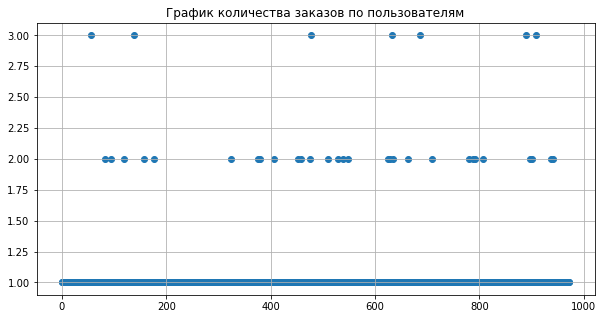

In [25]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(10,5))
plt.grid()
plt.title('График количества заказов по пользователям')
plt.scatter(x_values, ordersByUsers['orders']) 

<div class="alert alert-info">
<h2> Комментарий студента<a class="tocSkip"></h2>

 Большинство клиентов делали только 1 заказ. 3-4 заказ уже редкость. Остальное, скорее всего, можно считать за выбросы.
</div>

### Считаем 95-й и 99-й перцентили количества заказов на пользователя. Выбираем границу для определения аномальных пользователей. 

In [26]:

np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

<div class="alert alert-info">
<h2> Комментарий <a class="tocSkip"></h2>

Только 5% пользователей оформляли более 2 заказов. Возьмем 2 заказа за границу для определения аномальных пользователей. 
</div>

### Точечный график стоимостей заказов

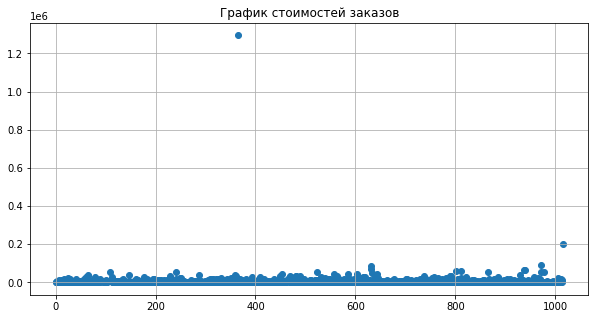

In [27]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(10,5))
plt.grid()
plt.title('График стоимостей заказов')
plt.scatter(x_values, orders['revenue'])

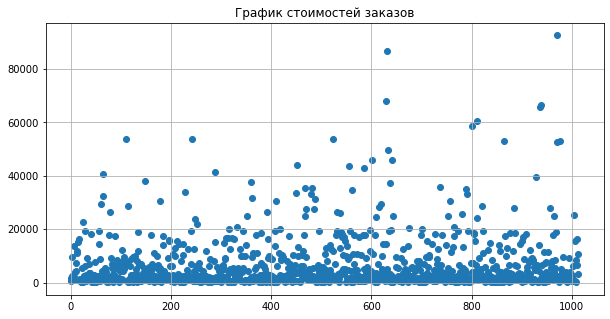

In [28]:
ordersOrdered = orders[orders['revenue']<=195000]['revenue']
xn_values = pd.Series(range(0,len(ordersOrdered)))
plt.figure(figsize=(10,5))
plt.grid()
plt.title('График стоимостей заказов')
plt.scatter(xn_values, ordersOrdered)

<div class="alert alert-info">
<h2> Комментарий<a class="tocSkip"></h2>
Явно видно два выброса, которые сильно повлияли на графики. На втором графике ограничим сумму заказаов и получаем более наглядный график. Большая часть заказов находится до 20 000. 
</div>

### Считаем 95-й и 99-й перцентили стоимости заказов. Выбираем границу для определения аномальных заказов

In [29]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

<div class="alert alert-info">
<h2> Комментарий<a class="tocSkip"></h2>
99% заказаов находятся до 53904. Эту сумму мы и будем использовать в качестве границы
</div>

### Считаем статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным

In [30]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

# Считаем суммарное число заказов до выбранной даты включительно в группах A и B
ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']


data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


In [31]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'transactionId']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'transactionId']

In [32]:
sampleA = pd.concat([ordersByUsersA['visitorId'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['visitorId'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['visitorId'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['visitorId'])), name='orders')],axis=0)

In [33]:
#Применим статистический критерий Манна-Уитни к полученным выборкам:

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.011
0.157


<div class="alert alert-info">
<h2> Комментарий <a class="tocSkip"></h2>

- Н0 статистически значимых различий в конверсии между группами нет 
- H1 статистически значимые различия есть
   
    Получаем, что p-value меньше 0.05. Значит, мы отвергаем гипотезу о том, что среди двух групп нет сатистически значимых различий в конверсии. Относительная разница равна 15,7%
</div>

### Считаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

In [34]:
#Применим статистический критерий Манна-Уитни к полученным выборкам:

print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.829
0.287


<div class="alert alert-info">
<h2> Комментарий<a class="tocSkip"></h2>

- Н0 статистически значимых различий в среднем чеке между группами нет 
- H1 статистически значимые различия есть
   
P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. 
</div>

### Считаем статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным

In [35]:
#выявляем аномальных пользователей
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['transactionId'] > 2]['visitorId'],
        ordersByUsersB[ordersByUsersB['transactionId'] > 2]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 53904]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099    148427295
33      249864742
58      611059232
949     887908475
744     888512513
Name: visitorId, dtype: int64
16


In [36]:
#Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве 
#заказов между группами теста по очищенным данным. 
#Сначала подготовим выборки количества заказов по пользователям по группам теста:

sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['transactionId'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['transactionId'])
            ),
            name='transactionId',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['transactionId'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['transactionId'])
            ),
            name='transactionId',
        ),
    ],
    axis=0,
)

In [37]:
#Применим статистический критерий Манна-Уитни к полученным выборкам:

print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.007
0.189


<div class="alert alert-info">
<h2> Комментарий <a class="tocSkip"></h2>
- Н0 статистически значимых различий в конверсии по очищенным данным между группами нет 
- H1 статистически значимые различия есть
   
Результат не изменился. P-value меньше 0.05, нулевую гипотезу отвергаем. 
Разница между группами 18,9%
</div>


### Считаем статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным

In [38]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.788
-0.032


<div class="alert alert-info">
<h2> Комментарий <a class="tocSkip"></h2>

- Н0 статистически значимых различий в среднем чеке  по очищенным данным между группами нет 
- H1 статистически значимые различия есть
    
    Причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия,тоже нет. Теперь группа В незначительно (на 3.2%) уступает группе А. Яркий пример, как сильно аномалии могут влиять на результаты A/B-теста.
</div>

<h2>  Часть 3. Выводы <a class="tocSkip"> </h2> 

<div class="alert alert-info">
<h2> Комментарий<a class="tocSkip"></h2>

- Есть статистически значимые различия по среднему количеству заказов между группами и по «сырым», и по данным после фильтрации аномалий. Разница группы В составялет 15,7 по не очищенным данным, и 18,9 по очищенным;
- Статистических различий в среднем чеке нет. По не очищенным данным группа В впереди на 28,7%. После очистки группа В уступает на 3,2%. Наглядно влияние закозов-выбросов.
- На основании этих данных можем сделать вывод, что можно остановить тест и зафиксировать победу группы В, т.к. разница в конверсии составляет 18,9%
</div>